<a href="https://colab.research.google.com/github/NewKanvas/Projeto-5/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Módulo 5 – Criptomoedas***

#### ***SOBRE O PROJETO***

`Esse é um projeto integrador, nós vamos utilizar
todas as ferramentas e conhecimentos trabalhados ao
longo do curso. `

**CONTEXTO**

Criptomoedas são moedas digitais descentralizadas baseadas em criptografia, que
operam em uma rede blockchain que permite transações seguras e transparentes
sem a necessidade de intermediários, como bancos. Elas fazem parte do mundo
digital, afetam a economia atual e são consideradas altamente voláteis.
Por isso, você e seu squad foram escalados por uma corretora financeira para
realizar uma análise exploratória relacionada à série histórica dos valores de
criptomoedas.

##### ***O QUE É PARA FAZER?***

Realizar uma análise exploratória histórica dos valores de
criptomoedas.
As fontes de dados que serão utilizadas no projeto estão
disponíveis no [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory).



##### ***COMO FAZER?***

**DETALHES DO PROJETO**

A análise deverá responder às seguintes perguntas:
1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma
tendência de queda ou de aumento?
2. Quais os valores médios para todas as criptomoedas?
3. Em quais anos houve maiores quedas e valorizações?
4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?
5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série
histórica?
6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série
histórica?
7. Existe correlação entre os valores para todas as criptomoedas?

### ***Importando as bibliotecas***

In [52]:

import pandas as pd # pip install pandas
import numpy as np # pip install numpy
import seaborn as sns # pip install seaborn
import matplotlib.pyplot as plt # pip install matplotlib
import plotly.graph_objs as go #pip install plotly nbformat Jinja2
import warnings

#Instalando tudo de uma vez:
#pip install pandas numpy seaborn matplotlib plotly nbformat Jinja2

# import plotly.express as px #  pip install --upgrade plotly

### **Tratando e Carregando Dados**

#### **Carregando Datasets**
> 23 Datasets disponibilizados pelo link do Kaggle

In [53]:
# Lendo os datasets
aave = pd.read_csv('https://raw.githubusercontent.com/NewKanvas/Projeto-5/main/Data/coin_Aave.csv')
binance_coin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_BinanceCoin.csv')
bitcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Bitcoin.csv')
cardano = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Cardano.csv')
chainlink = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_ChainLink.csv')
cosmos = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Cosmos.csv')
crypto_com_coin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_CryptocomCoin.csv')
dogecoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Dogecoin.csv')
eos = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_EOS.csv')
ethereum = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Ethereum.csv')
iota = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Iota.csv')
litecoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Litecoin.csv')
monero = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Monero.csv')
nem = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_NEM.csv')
polkadot = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Polkadot.csv')
solana = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Solana.csv')
stellar = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Stellar.csv')
tether = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Tether.csv')
tron = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Tron.csv')
uniswap = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Uniswap.csv')
usdcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_USDCoin.csv')
wrapped_bitcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_WrappedBitcoin.csv')
xrp = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_XRP.csv')


#### ***Unindo todos os datasets em 1 dataframe.***

In [54]:
# Concatenando Datasets
cripto = pd.concat([aave, binance_coin, bitcoin, cardano, chainlink, cosmos, crypto_com_coin, dogecoin, eos, ethereum, iota, litecoin, monero, nem, polkadot, solana, stellar, tether, tron, uniswap, usdcoin, wrapped_bitcoin, xrp], ignore_index=True)


#### ***Limpeza dos Dados***

In [55]:
#Convertendo para conter somente a Data
cripto['Date'] = pd.to_datetime(cripto['Date']).dt.date 

In [56]:
# Removendo Colunas que não utilizaremos
del cripto['SNo']
del cripto['Symbol']

In [57]:
## Traduzindo Colunas
traducao = {"Name": "Moeda",
            "Date": "Data",
            "High": "Alta",
            "Low": "Baixa",
            "Open": "Abertura",
            "Close": "Fechamento",
            "Volume": "Volume",
            "Marketcap": "Marketcap",} # Gerando dicionario para tradução
cripto.rename(columns=traducao, inplace=True)# Renomeando

In [58]:
cripto

,Moeda,Data,Alta,Baixa,Abertura,Fechamento,Volume,Marketcap
0,Aave,2020-10-05,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,Aave,2020-10-06,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,Aave,2020-10-07,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,Aave,2020-10-08,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,Aave,2020-10-09,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...
37077,XRP,2021-07-02,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
37078,XRP,2021-07-03,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
37079,XRP,2021-07-04,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
37080,XRP,2021-07-05,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


In [59]:
cripto.dtypes

Moeda          object
Data           object
Alta          float64
Baixa         float64
Abertura      float64
Fechamento    float64
Volume        float64
Marketcap     float64
dtype: object

## Formantando valores

In [60]:
format = lambda x: '%.2f' % x # %x (aplica no x)
cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']] = cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']].applymap(format)
cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']] = cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']].astype(float) # Reformatando os valores para float

C:\Users\36131502023.1\AppData\Local\Temp\ipykernel_10320\4245637394.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']] = cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']].applymap(format)


In [61]:
cripto

,Moeda,Data,Alta,Baixa,Abertura,Fechamento,Volume,Marketcap
0,Aave,2020-10-05,55.11,49.79,52.68,53.22,0.000000e+00,8.912813e+07
1,Aave,2020-10-06,53.40,40.73,53.29,42.40,5.830915e+05,7.101144e+07
2,Aave,2020-10-07,42.41,35.97,42.40,40.08,6.828342e+05,6.713004e+07
3,Aave,2020-10-08,44.90,36.70,39.89,43.76,1.658817e+06,2.202651e+08
4,Aave,2020-10-09,47.57,43.29,43.76,46.82,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...
37077,XRP,2021-07-02,0.67,0.63,0.66,0.66,2.061607e+09,3.030759e+10
37078,XRP,2021-07-03,0.68,0.64,0.66,0.67,1.872820e+09,3.105172e+10
37079,XRP,2021-07-04,0.71,0.67,0.67,0.69,1.885242e+09,3.206960e+10
37080,XRP,2021-07-05,0.70,0.65,0.70,0.65,2.076373e+09,3.019395e+10


In [62]:
cripto.dtypes

Moeda          object
Data           object
Alta          float64
Baixa         float64
Abertura      float64
Fechamento    float64
Volume        float64
Marketcap     float64
dtype: object

### **Selecionando 10 criptomoedas:**

#### Agrupando os valores das moedas

In [63]:
# Criando copia Formatada do Dataframe Original
cripto_form = cripto.set_index(['Moeda', 'Data']).unstack(level=0) 
# Selecionando o valor de Fechamento
cripto_grp = cripto_form['Fechamento'] # Pode mudar para selecionar outro valor

cripto_grp

Moeda,Aave,Binance Coin,Bitcoin,Cardano,Chainlink,Cosmos,Crypto.com Coin,Dogecoin,EOS,Ethereum,...,NEM,Polkadot,Solana,Stellar,TRON,Tether,USD Coin,Uniswap,Wrapped Bitcoin,XRP
Data,,,,,,,,,,,,,,,,,,,,,
2013-04-29,NaN,NaN,144.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,139.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,116.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,105.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,97.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02,233.95,287.42,33897.05,1.39,18.28,11.76,0.11,0.25,3.93,2150.04,...,0.13,15.34,34.02,0.26,0.07,1.0,1.0,18.24,33824.26,0.66
2021-07-03,259.66,298.24,34668.55,1.41,18.54,11.82,0.12,0.25,4.05,2226.11,...,0.13,15.55,34.48,0.26,0.07,1.0,1.0,19.52,34676.99,0.67
2021-07-04,277.04,307.73,35287.78,1.46,19.26,12.26,0.12,0.25,4.06,2321.72,...,0.14,16.01,34.31,0.27,0.07,1.0,1.0,20.77,35289.76,0.69


#### Gerando as medias das Moedas Selecionadas

In [64]:
cripto_mean = cripto_grp.mean().sort_values(ascending=False) # Verificando as maiores medias de fechamento.

cripto_mean

Moeda
Wrapped Bitcoin    17086.573806
Bitcoin             6711.290425
Ethereum             383.910727
Aave                 255.525782
Monero                74.134712
Binance Coin          52.250319
Litecoin              49.279017
Polkadot              18.143031
Uniswap               17.077329
Solana                10.471615
Cosmos                 6.768154
Chainlink              6.308527
EOS                    4.624175
USD Coin               1.003383
Tether                 1.000475
IOTA                   0.729340
Cardano                0.256179
XRP                    0.235309
NEM                    0.124537
Stellar                0.100677
Crypto.com Coin        0.081743
TRON                   0.032414
Dogecoin               0.012659
dtype: float64

#### Filtrando as Moedas

In [65]:
cripto_mean = cripto_mean.drop('Wrapped Bitcoin') # Removendo a Wrapped Bitcoin
cripto_mean = cripto_mean.head(10) # Pegando as 10 maiores
cripto_mean

Moeda
Bitcoin         6711.290425
Ethereum         383.910727
Aave             255.525782
Monero            74.134712
Binance Coin      52.250319
Litecoin          49.279017
Polkadot          18.143031
Uniswap           17.077329
Solana            10.471615
Cosmos             6.768154
dtype: float64

In [66]:
cripto_top10 = cripto_mean.index.tolist() # Pegando os Indices e colocando em uma lista
cripto_top10

['Bitcoin',
 'Ethereum',
 'Aave',
 'Monero',
 'Binance Coin',
 'Litecoin',
 'Polkadot',
 'Uniswap',
 'Solana',
 'Cosmos']

#### Criando Novo Dataframe das Moedas selecionadas

In [67]:
criptocopy = cripto[cripto['Moeda'].isin(cripto_top10)].reset_index(drop=True) # Filtrando no DataFrame Original para pegar somente as moedas selecionadas
criptocopy

,Moeda,Data,Alta,Baixa,Abertura,Fechamento,Volume,Marketcap
0,Aave,2020-10-05,55.11,49.79,52.68,53.22,0.000000e+00,8.912813e+07
1,Aave,2020-10-06,53.40,40.73,53.29,42.40,5.830915e+05,7.101144e+07
2,Aave,2020-10-07,42.41,35.97,42.40,40.08,6.828342e+05,6.713004e+07
3,Aave,2020-10-08,44.90,36.70,39.89,43.76,1.658817e+06,2.202651e+08
4,Aave,2020-10-09,47.57,43.29,43.76,46.82,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...
14365,Uniswap,2021-07-02,18.24,16.98,17.83,18.24,3.070457e+08,1.049364e+10
14366,Uniswap,2021-07-03,19.52,17.85,18.23,19.52,3.448554e+08,1.146609e+10
14367,Uniswap,2021-07-04,21.48,18.95,19.48,20.77,5.404909e+08,1.219861e+10
14368,Uniswap,2021-07-05,20.87,19.18,20.77,20.10,5.452744e+08,1.180130e+10


In [68]:
# Transformar a coluna "Data" em datetime
criptocopy['Data'] = pd.to_datetime(criptocopy['Data'])

# Adicionar a coluna "Variação [%]"
criptocopy['Variação [%]'] = (criptocopy['Fechamento'] - criptocopy['Abertura']) / criptocopy['Abertura'] * 100

# Adicionar a coluna "Dia da Semana"
criptocopy['Dia da Semana'] = criptocopy['Data'].dt.day_name()


In [69]:
# Dicionário com os dias da semana em inglês e suas traduções em português
dias_semana = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Traduzir os dias da semana
criptocopy['Dia da Semana'] = criptocopy['Dia da Semana'].map(dias_semana)
criptocopy

,Moeda,Data,Alta,Baixa,Abertura,Fechamento,Volume,Marketcap,Variação [%],Dia da Semana
0,Aave,2020-10-05,55.11,49.79,52.68,53.22,0.000000e+00,8.912813e+07,1.025057,Segunda-feira
1,Aave,2020-10-06,53.40,40.73,53.29,42.40,5.830915e+05,7.101144e+07,-20.435354,Terça-feira
2,Aave,2020-10-07,42.41,35.97,42.40,40.08,6.828342e+05,6.713004e+07,-5.471698,Quarta-feira
3,Aave,2020-10-08,44.90,36.70,39.89,43.76,1.658817e+06,2.202651e+08,9.701680,Quinta-feira
4,Aave,2020-10-09,47.57,43.29,43.76,46.82,8.155377e+05,2.356322e+08,6.992687,Sexta-feira
...,...,...,...,...,...,...,...,...,...,...
14365,Uniswap,2021-07-02,18.24,16.98,17.83,18.24,3.070457e+08,1.049364e+10,2.299495,Sexta-feira
14366,Uniswap,2021-07-03,19.52,17.85,18.23,19.52,3.448554e+08,1.146609e+10,7.076248,Sábado
14367,Uniswap,2021-07-04,21.48,18.95,19.48,20.77,5.404909e+08,1.219861e+10,6.622177,Domingo
14368,Uniswap,2021-07-05,20.87,19.18,20.77,20.10,5.452744e+08,1.180130e+10,-3.225806,Segunda-feira


In [70]:
criptocopy['Moeda'].unique() # Verificando as moedas selecionadas

array(['Aave', 'Binance Coin', 'Bitcoin', 'Cosmos', 'Ethereum',
       'Litecoin', 'Monero', 'Polkadot', 'Solana', 'Uniswap'],
      dtype=object)

In [71]:
criptocopy.dtypes

Moeda                    object
Data             datetime64[ns]
Alta                    float64
Baixa                   float64
Abertura                float64
Fechamento              float64
Volume                  float64
Marketcap               float64
Variação [%]            float64
Dia da Semana            object
dtype: object

### **Criando CSVs**

In [72]:
# criptocopy.to_csv('../Data/criptomoedas.csv', index=False) # Salvando tabela filtrada em csv
# cripto.to_csv('../Data/cripto.csv', index=False) # Salvando tabela em csv

# **Questões**:

## **1- Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma tendência de queda ou de aumento?**

### Análise Gráfica utilizando média móvel

In [73]:
data_inicio5 = '1990-06-06'
data_fim5 = '2021-07-06'

### Dropando Colunas não utilizadas ###

columns_to_drop = ["Alta","Baixa","Volume","Marketcap","Variação [%]","Dia da Semana"]

criptocopy5 = criptocopy.drop(columns_to_drop, axis=1).copy()
#criptocopy5

# Filtrar o DataFrame com base no período desejado
criptocopy5 = criptocopy5[(criptocopy['Data'] >= data_inicio5) & (criptocopy['Data'] <= data_fim5)]
criptocopy5

,Moeda,Data,Abertura,Fechamento
0,Aave,2020-10-05,52.68,53.22
1,Aave,2020-10-06,53.29,42.40
2,Aave,2020-10-07,42.40,40.08
3,Aave,2020-10-08,39.89,43.76
4,Aave,2020-10-09,43.76,46.82
...,...,...,...,...
14365,Uniswap,2021-07-02,17.83,18.24
14366,Uniswap,2021-07-03,18.23,19.52
14367,Uniswap,2021-07-04,19.48,20.77
14368,Uniswap,2021-07-05,20.77,20.10


In [74]:
# Definir o período desejado

data_inicio = '1900-01-01'
data_fim = '2021-07-06'

### Dropando Colunas não utilizadas ###

columns_to_drop = ["Alta","Baixa","Volume","Marketcap","Variação [%]","Dia da Semana"]

criptocopy1 = criptocopy.drop(columns_to_drop, axis=1).copy()
#criptocopy1

# Filtrar o DataFrame com base no período desejado
criptocopy_periodo1 = criptocopy1[(criptocopy1['Data'] >= data_inicio) & (criptocopy1['Data'] <= data_fim)]
criptocopy_periodo1


,Moeda,Data,Abertura,Fechamento
0,Aave,2020-10-05,52.68,53.22
1,Aave,2020-10-06,53.29,42.40
2,Aave,2020-10-07,42.40,40.08
3,Aave,2020-10-08,39.89,43.76
4,Aave,2020-10-09,43.76,46.82
...,...,...,...,...
14365,Uniswap,2021-07-02,17.83,18.24
14366,Uniswap,2021-07-03,18.23,19.52
14367,Uniswap,2021-07-04,19.48,20.77
14368,Uniswap,2021-07-05,20.77,20.10


In [75]:
tab_bitcoin = criptocopy_periodo1 .query('Moeda == "Bitcoin"')
tab_ethereum = criptocopy_periodo1 .query('Moeda == "Ethereum"')
tab_aave = criptocopy_periodo1.query('Moeda == "Aave"')
tab_monero = criptocopy_periodo1.query('Moeda == "Monero"')
tab_binance = criptocopy_periodo1.query('Moeda == "Binance Coin"')
tab_litecoin = criptocopy_periodo1.query('Moeda == "Litecoin"')
tab_polkadot = criptocopy_periodo1.query('Moeda == "Polkadot"')
tab_uniswap = criptocopy_periodo1.query('Moeda == "Uniswap"')
tab_solana = criptocopy_periodo1.query('Moeda == "Solana"')
tab_cosmos = criptocopy_periodo1.query('Moeda == "Cosmos"')

moedas = [tab_bitcoin,tab_ethereum,tab_aave,tab_monero,tab_binance,tab_litecoin,tab_polkadot,tab_uniswap,tab_solana,tab_cosmos ]

In [109]:
periodo = 30


tab_bitcoin['media_movel'] = tab_bitcoin['Fechamento'].rolling(window=periodo).mean()
tab_ethereum['media_movel'] = tab_ethereum['Fechamento'].rolling(window=periodo).mean()
tab_aave['media_movel'] = tab_aave['Fechamento'].rolling(window=periodo).mean()
tab_monero['media_movel'] = tab_monero['Fechamento'].rolling(window=periodo).mean()
tab_binance['media_movel'] = tab_binance['Fechamento'].rolling(window=periodo).mean()
tab_litecoin['media_movel'] = tab_litecoin['Fechamento'].rolling(window=periodo).mean()
tab_polkadot['media_movel'] = tab_polkadot['Fechamento'].rolling(window=periodo).mean()
tab_uniswap['media_movel'] = tab_uniswap['Fechamento'].rolling(window=periodo).mean()
tab_solana['media_movel'] = tab_solana['Fechamento'].rolling(window=periodo).mean()
tab_cosmos['media_movel'] = tab_cosmos['Fechamento'].rolling(window=periodo).mean()

# Desativa todos os avisos
warnings.filterwarnings("ignore")

In [77]:
import plotly.graph_objs as go

# Criando os traces (linhas) para cada criptomoeda
trace_bitcoin = go.Scatter(x=tab_bitcoin['Data'], y=tab_bitcoin['media_movel'], mode='lines', name='Bitcoin', line=dict(color='green', width=2))
trace_ethereum = go.Scatter(x=tab_ethereum['Data'], y=tab_ethereum['media_movel'], mode='lines', name='Ethereum', line=dict(color='purple', width=2))
trace_aave = go.Scatter(x=tab_aave['Data'], y=tab_aave['media_movel'], mode='lines', name='Aave', line=dict(color='pink', width=2))
trace_monero = go.Scatter(x=tab_monero['Data'], y=tab_monero['media_movel'], mode='lines', name='Monero', line=dict(color='blue', width=2))
trace_binance = go.Scatter(x=tab_binance['Data'], y=tab_binance['media_movel'], mode='lines', name='Binance Coin', line=dict(color='red', width=2))
trace_litecoin = go.Scatter(x=tab_litecoin['Data'], y=tab_litecoin['media_movel'], mode='lines', name='Litecoin', line=dict(color='orange', width=2))
trace_polkadot = go.Scatter(x=tab_polkadot['Data'], y=tab_polkadot['media_movel'], mode='lines', name='Polkadot', line=dict(color='cyan', width=2))
trace_uniswap = go.Scatter(x=tab_uniswap['Data'], y=tab_uniswap['media_movel'], mode='lines', name='Uniswap', line=dict(color='magenta', width=2))
trace_solana = go.Scatter(x=tab_solana['Data'], y=tab_solana['media_movel'], mode='lines', name='Solana', line=dict(color='yellow', width=2))
trace_cosmos = go.Scatter(x=tab_cosmos['Data'], y=tab_cosmos['media_movel'], mode='lines', name='Cosmos', line=dict(color='lime', width=2))

# Criando o layout
layout = go.Layout(
    title='Comportamento de Valores [Absolutos]',
    xaxis=dict(title='Data'),
    yaxis=dict(title='Valor')
)

# Criando a figura
fig = go.Figure(data=[trace_bitcoin, trace_ethereum, trace_aave, trace_monero, trace_binance, trace_litecoin, trace_polkadot, trace_uniswap, trace_solana, trace_cosmos], layout=layout)

# Exibindo o gráfico
fig.show()

É importante lembrar que o mercado de criptomoedas é altamente volátil e influenciado por uma variedade de fatores, por isso optamos por suavizar a curva para podermos vizualizar melhor as tentendencias, momentos de pico e de vale. Podemos ver um movimento padrãos da Criptos com máximos de valorização na transição de 2017 para 2018, e primeiro semestre de 2021. 

Os movimentos de alta foram iniciados no primeiro semestre de 2017, quando houve um boom no mercado de criptomoedas impulsionado pelo aumento da adoção e pelo interesse crescente de investidores. O Bitcoin atingiu seu preço mais alto até então, impulsionado pelo entusiasmo em torno da tecnologia blockchain e pela expectativa de ganhos rápidos.  Outro ponto de inflexão foi no inicio de 2020, junto com a pandemia de Covid-19 desempenhou um papel importante nesse movimento. A crise global e as medidas de estímulo adotadas por governos e bancos centrais aumentaram a busca por ativos alternativos, incluindo criptomoedas. Muitos investidores viram as criptomoedas como uma reserva de valor e uma proteção contra a inflação.

 Nos ultimos 3 meses podemos observar uma tendencia de desvalorização.

### Analise Temporal

In [78]:
# Criando um DataFrame vazio
df = pd.DataFrame(columns=['Moeda', 'Valor Inicial','2020', '12 meses', '6 meses','3 meses', 'Ultimo Mês', 'Último Dado'])


# Adicionando os valores de fechamento para cada moeda
for i, tab_moeda in enumerate(moedas):
    df.loc[i, 'Moeda'] = tab_moeda['Moeda'].iloc[0]  # Primeiro Valor
    df.loc[i, 'Valor Inicial'] = tab_moeda['Abertura'].iloc[0]  # Primeiro Valor
    try:
      df.loc[i, '2020'] = tab_moeda['Fechamento'].iloc[-552]
    except:
      df.loc[i, '2020'] = None
    try:
      df.loc[i, '12 meses'] = tab_moeda['Fechamento'].iloc[-365]
    except:
      df.loc[i, '12 meses'] = None
    df.loc[i, '6 meses'] = tab_moeda['Fechamento'].iloc[-180]
    df.loc[i, '3 meses'] = tab_moeda['Fechamento'].iloc[-90]
    df.loc[i, 'Ultimo Mês'] = tab_moeda['Fechamento'].iloc[-30]
    df.loc[i, 'Último Dado'] = tab_moeda['Fechamento'].iloc[-1]


#display(df)

In [79]:
# tab_moeda_solana = criptocopy[criptocopy['Moeda'] == 'Solana']
# tab_moeda_solana 

In [80]:
novo_df = pd.DataFrame({
    'Moeda': df['Moeda'],
    'Todo Periodo': (df['Último Dado']/ df['Valor Inicial'] -1)*100,
    '2020': (df['Último Dado']/df['2020'] -1)*100,
    '12 meses': (df['Último Dado']/df['12 meses'] -1)*100,
    '6 meses': (df['Último Dado']/df['6 meses'] -1)*100,
    '3 meses': (df['Último Dado']/df['3 meses'] -1)*100,
    'Ultimo Mês': (df['Último Dado']/df['Ultimo Mês'] -1)*100,
})


# Função para aplicar a formatação condicional
def color_negative_red(value):
    if pd.isna(value):
        return 'color: black; font-weight: bold'
    color = 'red' if value < 0 else 'green'
    return 'color: %s; font-weight: bold' % color



# Ordenando o DataFrame novo_df pelo último mês
novo_df_sorted = novo_df.sort_values(by='Todo Periodo', ascending=False)

# Aplicando a formatação condicional ao DataFrame ordenado e imprimindo
styled_df_sorted = novo_df_sorted.style.map(color_negative_red, subset=['Todo Periodo','2020', '12 meses', '6 meses', '3 meses', 'Ultimo Mês'])

# Arredondando os valores no objeto styled_df_sorted
styled_df_arredondado = styled_df_sorted.format(precision=2)

# Exibindo o DataFrame arredondado
styled_df_arredondado

,Moeda,Todo Periodo,2020,12 meses,6 meses,3 meses,Ultimo Mês
4,Binance Coin,291654.55,2363.01,1813.71,656.91,-23.23,-10.18
1,Ethereum,83221.86,1724.57,872.34,89.89,11.30,-10.25
0,Bitcoin,25365.03,390.09,270.02,-16.09,-41.30,2.01
3,Monero,13871.07,385.55,244.24,55.85,-17.73,-10.76
8,Solana,3507.37,nan,4469.33,964.29,26.79,-10.43
5,Litecoin,3080.55,249.05,220.84,-19.79,-38.77,-14.06
7,Uniswap,541.83,nan,nan,280.31,-25.88,-7.44
2,Aave,501.56,nan,nan,183.71,-16.15,-5.09
6,Polkadot,456.55,nan,nan,73.36,-60.99,-25.38
9,Cosmos,98.49,221.76,306.17,121.18,-35.87,-1.86


Ao analisar a tabela, é possível observar que a maioria das criptomoedas apresentou valorização em sua série histórica. O Bitcoin, embora tenha o maior valor absoluto, não registrou a maior valorização relativa, ocupando o terceiro lugar nesse aspecto.

Foi realizado um recorte de dados a partir de 1º de janeiro de 2020 para analisar o impacto da pandemia de Covid-19 nas criptomoedas. Nesse período, a maioria das criptomoedas valorizou-se até a data de encerramento da análise. Tanto no último ano quanto nos últimos seis meses, a tendência predominante foi de aumento, com poucas exceções.

No entanto, nos últimos três meses e no último mês, houve uma tendência geral de desvalorização das moedas, com algumas exceções. Esse fenômeno pode ser atribuído à retomada gradual das atividades econômicas ao longo de 2021, impulsionada pelos avanços científicos na vacinação contra a Covid-19. Isso levou a uma revisão da percepção de risco e resultou em uma diminuição do interesse por investimentos em criptomoedas.

É importante destacar que essas observações são baseadas em análises históricas e em tendências passadas, e não garantem resultados futuros. O mercado de criptomoedas é altamente volátil e influenciado por uma ampla gama de fatores, como eventos econômicos, regulatórios e tecnológicos.

## **2- Quais os valores médios para todas as criptomoedas?**


### Analisando toda Série Histórica

In [81]:
# Calcular o valor médio de fechamento para cada moeda
media_fechamento = criptocopy.groupby('Moeda')['Fechamento'].mean()

# Ordenar em ordem decrescente pelo valor médio de fechamento
media_fechamento = media_fechamento.sort_values(ascending=False)

# Criar DataFrame com a média de fechamento para cada moeda
df_media_fechamento = pd.DataFrame(media_fechamento).rename(columns={'Fechamento': 'Valor Médio'})

# Exibir o valor médio de fechamento para cada moeda
df_media_fechamento

,Valor Médio
Moeda,
Bitcoin,6711.290425
Ethereum,383.910727
Aave,255.525782
Monero,74.134712
Binance Coin,52.250319
Litecoin,49.279017
Polkadot,18.143031
Uniswap,17.077329
Solana,10.471615


### Analisando Ano a Ano

In [82]:
# Extrai o ano da coluna "Data"
criptocopy['Ano'] = pd.to_datetime(criptocopy['Data']).dt.year

# Calcula a média de fechamento agrupando por moeda e ano
medias2 = criptocopy.groupby(['Moeda', 'Ano'])['Fechamento'].mean()

# Transforma a série em um DataFrame
medias2 = medias2.unstack()

# Ordenar o DataFrame pela última coluna em ordem crescente
medias2= medias2.sort_values(by=medias2.columns[-1], ascending=False)


# Imprime o DataFrame "medias2"
medias2

Ano,2013,2014,2015,2016,2017,2018,2019,2020,2021
Moeda,,,,,,,,,
Bitcoin,257.973441,527.236548,272.453397,568.492186,4006.033616,7572.298877,7395.246630,11116.377869,45539.275775
Ethereum,NaN,NaN,0.930205,9.778115,223.915288,483.507781,181.770247,307.542896,2077.092567
Aave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.664318,346.754706
Binance Coin,NaN,NaN,NaN,NaN,1.979308,11.172493,20.093233,21.350355,298.417273
Monero,NaN,1.555695,0.490712,3.688224,75.902192,168.043479,66.491288,84.943470,249.325134
Litecoin,6.675992,9.845041,2.694712,3.788743,50.031863,105.776274,69.666932,56.243607,197.311872
Polkadot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.822180,27.617219
Uniswap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.508000,24.696471
Solana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700415,22.901390


In [83]:
# Converter a coluna 'Data' para o tipo datetime
criptocopy['Data'] = pd.to_datetime(criptocopy['Data'])

# Calcular o ano a partir da data
criptocopy['Ano'] = criptocopy['Data'].dt.year

# Calcular a média de fechamento para cada moeda por ano
media_fechamento = criptocopy.groupby(['Moeda', 'Ano'], sort=False)['Fechamento'].mean().reset_index()

# Ordenar o DataFrame pela coluna 'Fechamento' em ordem decrescente
media_fechamento = media_fechamento.sort_values(by='Fechamento', ascending=False)

# Criar o gráfico de barras
fig = go.Figure()

for moeda in media_fechamento['Moeda'].unique():
    data_moeda = media_fechamento[media_fechamento['Moeda'] == moeda]
    
    fig.add_trace(go.Bar(
        x=data_moeda['Ano'],
        y=data_moeda['Fechamento'],
        name=f'{moeda}'
    ))

# Definir os títulos dos eixos
fig.update_layout(
    xaxis_title='Ano',
    yaxis_title='Média de Fechamento'
)

# Exibir o gráfico
fig.show()

## ****3. Em quais anos houve maiores quedas e valorizações?**


In [84]:
# Obter anos únicos
criptocopy['Data'] = pd.to_datetime(criptocopy['Data'])
anos = criptocopy['Data'].dt.year.unique()

# Inicializar uma lista para armazenar os dados
dados = []

# Loop para cada moeda
for moeda in cripto_top10:
    # Loop para cada ano
    for ano in anos:
        # Filtrar os dados para a moeda e ano específicos
        dados_moeda_ano = criptocopy[(criptocopy['Moeda'] == moeda) & (criptocopy['Data'].dt.year == ano)]
        
        # Verificar se existem dados para a moeda e ano específicos
        if len(dados_moeda_ano) > 0:
            # Obter o índice do valor máximo de Fechamento com base na maior data do ano
            indice_max = dados_moeda_ano[dados_moeda_ano['Data'] == dados_moeda_ano['Data'].max()]['Fechamento'].idxmax()
            
            # Obter o índice do valor mínimo de Abertura com base na menor data do ano
            indice_min = dados_moeda_ano[dados_moeda_ano['Data'] == dados_moeda_ano['Data'].min()]['Abertura'].idxmin()
            
            # Obter os valores de Fechamento e Abertura correspondentes
            valor_max = dados_moeda_ano.loc[indice_max, 'Fechamento']
            valor_min = dados_moeda_ano.loc[indice_min, 'Abertura']
            
            # Calcular a variação percentual
            variacao = (valor_max - valor_min) / valor_min * 100
            variacao = round(variacao,2)
            
            # Adicionar os dados à lista
            dados.append([moeda, ano, valor_max, valor_min, variacao])

# Criar o dataframe
df_year = pd.DataFrame(dados, columns=['Moeda', 'Ano', 'Max', 'Min', 'Variacao_Percentual'])

# Exibir o dataframe
#df_year

In [85]:
tab_year_bitcoin = df_year[df_year['Moeda'] == "Bitcoin"].sort_values('Ano').reset_index(drop=True)
tab_year_ethereum = df_year[df_year['Moeda'] == "Ethereum"].sort_values('Ano').reset_index(drop=True)
tab_year_aave = df_year[df_year['Moeda'] == "Aave"].sort_values('Ano').reset_index(drop=True)
tab_year_monero = df_year[df_year['Moeda'] == "Monero"].sort_values('Ano').reset_index(drop=True)
tab_year_binance = df_year[df_year['Moeda'] == "Binance Coin"].sort_values('Ano').reset_index(drop=True)
tab_year_litecoin = df_year[df_year['Moeda'] == "Litecoin"].sort_values('Ano').reset_index(drop=True)
tab_year_polkadot = df_year[df_year['Moeda'] == "Polkadot"].sort_values('Ano').reset_index(drop=True)
tab_year_uniswap = df_year[df_year['Moeda'] == "Uniswap"].sort_values('Ano').reset_index(drop=True)
tab_year_solana = df_year[df_year['Moeda'] == "Solana"].sort_values('Ano').reset_index(drop=True)
tab_year_cosmos = df_year[df_year['Moeda'] == "Cosmos"].sort_values('Ano').reset_index(drop=True)

In [86]:
tab_year_ethereum

,Moeda,Ano,Max,Min,Variacao_Percentual
0,Ethereum,2015,0.93,2.79,-66.67
1,Ethereum,2016,7.97,0.93,756.99
2,Ethereum,2017,756.73,7.98,9382.83
3,Ethereum,2018,133.37,755.76,-82.35
4,Ethereum,2019,129.61,133.42,-2.86
5,Ethereum,2020,737.80,129.63,469.16
6,Ethereum,2021,2324.68,737.71,215.12


In [87]:
# Criando os traces (linhas) para cada criptomoeda
trace3_bitcoin = go.Scatter(x=tab_year_bitcoin['Ano'], y=tab_year_bitcoin['Variacao_Percentual'], mode='lines', name='Bitcoin', line=dict(color='green', width=2))
trace3_ethereum = go.Scatter(x=tab_year_ethereum['Ano'], y=tab_year_ethereum['Variacao_Percentual'], mode='lines', name='Ethereum', line=dict(color='purple', width=2))
trace3_aave = go.Scatter(x=tab_year_aave['Ano'], y=tab_year_aave['Variacao_Percentual'], mode='lines', name='Aave', line=dict(color='pink', width=2))
trace3_monero = go.Scatter(x=tab_year_monero['Ano'], y=tab_year_monero['Variacao_Percentual'], mode='lines', name='Monero', line=dict(color='blue', width=2))
trace3_binance = go.Scatter(x=tab_year_binance['Ano'], y=tab_year_binance['Variacao_Percentual'], mode='lines', name='Binance Coin', line=dict(color='red', width=2))
trace3_litecoin = go.Scatter(x=tab_year_litecoin['Ano'], y=tab_year_litecoin['Variacao_Percentual'], mode='lines', name='Litecoin', line=dict(color='orange', width=2))
trace3_polkadot = go.Scatter(x=tab_year_polkadot['Ano'], y=tab_year_polkadot['Variacao_Percentual'], mode='lines', name='Polkadot', line=dict(color='cyan', width=2))
trace3_uniswap = go.Scatter(x=tab_year_uniswap['Ano'], y=tab_year_uniswap['Variacao_Percentual'], mode='lines', name='Uniswap', line=dict(color='magenta', width=2))
trace3_solana = go.Scatter(x=tab_year_solana['Ano'], y=tab_year_solana['Variacao_Percentual'], mode='lines', name='Solana', line=dict(color='yellow', width=2))
trace3_cosmos = go.Scatter(x=tab_year_cosmos['Ano'], y=tab_year_cosmos['Variacao_Percentual'], mode='lines', name='Cosmos', line=dict(color='lime', width=2))

# Criando o layout
layout = go.Layout(
    title='Comportamento de Valores',
    xaxis=dict(title='Ano'),
    yaxis=dict(title='Variacao_Percentual')
)

# Criando a figura
fig = go.Figure(data=[trace3_bitcoin, trace3_ethereum, trace3_aave, trace3_monero, trace3_binance, trace3_litecoin, trace3_polkadot, trace3_uniswap, trace3_solana, trace3_cosmos], layout=layout)

# Exibindo o gráfico
fig.show()

In [111]:
df_sorted = df_year[df_year['Ano'] == 2017].sort_values('Variacao_Percentual', ascending=False)
display(df_sorted)

,Moeda,Ano,Max,Min,Variacao_Percentual
11,Ethereum,2017,756.73,7.98,9382.83
28,Binance Coin,2017,8.64,0.11,7754.55
33,Litecoin,2017,232.10,4.33,5260.28
20,Monero,2017,349.03,13.79,2431.04
2,Bitcoin,2017,14156.40,963.66,1369.02


In [89]:
df_sorted = df_year[df_year['Ano'] == 2018].sort_values('Variacao_Percentual', ascending=True)
display(df_sorted)

,Moeda,Ano,Max,Min,Variacao_Percentual
34,Litecoin,2018,30.47,231.67,-86.85
21,Monero,2018,46.23,349.55,-86.77
12,Ethereum,2018,133.37,755.76,-82.35
3,Bitcoin,2018,3742.70,14112.20,-73.48
29,Binance Coin,2018,6.16,8.63,-28.62


No ano de 2017, foi registrado um notável aumento na valorização relativa das criptomoedas em relação ao ano anterior. O Ethereum, em particular, obteve um crescimento de aproximadamente 9400%, demonstrando uma performance exponencialmente positiva. A Bitcoin apresentou o crescimento mais "modesto", atingindo cerca de 1400%.

O ano de 2018 foi marcado por uma reversão de tendência, com a maioria das criptomoedas experimentando desvalorização. Esse declínio pode ser atribuído, em grande parte, à correção de mercado após o período de alta intensidade observado em 2017. A especulação excessiva e a euforia resultaram em uma reavaliação dos ativos, levando a valores negativos em geral

## 4 - Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?

In [90]:
# Definir o período desejado

data_inicio = '2021-01-01'
data_fim = '2021-07-06'

### Dropando Colunas não utilizadas ###

columns_to_drop = ["Alta","Baixa","Abertura","Volume","Marketcap","Ano"]

criptocopy_periodo = criptocopy.drop(columns_to_drop, axis=1).copy()

# Filtrar o DataFrame com base no período desejado
criptocopy_periodo = criptocopy_periodo[(criptocopy_periodo['Data'] >= data_inicio) & (criptocopy_periodo['Data'] <= data_fim)]

# #Analisando Apenas Bitcoin
# criptocopy_periodo2 = criptocopy_periodo[(criptocopy_periodo['Data'] >= data_inicio) & (criptocopy_periodo['Data'] <= data_fim)]
# criptocopy_periodo = criptocopy_periodo2[criptocopy_periodo2['Moeda'] == 'Bitcoin'].copy()

criptocopy_periodo 

,Moeda,Data,Fechamento,Variação [%],Dia da Semana
88,Aave,2021-01-01,90.35,3.209961,Sexta-feira
89,Aave,2021-01-02,85.71,-5.167072,Sábado
90,Aave,2021-01-03,91.10,6.288648,Domingo
91,Aave,2021-01-04,111.13,21.813000,Segunda-feira
92,Aave,2021-01-05,116.45,4.768331,Terça-feira
...,...,...,...,...,...
14365,Uniswap,2021-07-02,18.24,2.299495,Sexta-feira
14366,Uniswap,2021-07-03,19.52,7.076248,Sábado
14367,Uniswap,2021-07-04,20.77,6.622177,Domingo
14368,Uniswap,2021-07-05,20.10,-3.225806,Segunda-feira


In [91]:
# Calcular a média de fechamento para cada dia da semana
media_fechamento = criptocopy_periodo.groupby('Dia da Semana')['Fechamento'].mean()

# Criar um DataFrame com as médias
df_medias = pd.DataFrame({'Média de Fechamento': media_fechamento})

# Definir a ordem dos dias da semana começando por domingo
ordem_dias_semana = ['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']

# Reordenar o DataFrame de acordo com a ordem dos dias da semana
df_medias = df_medias.reindex(ordem_dias_semana)

# Mostrar o DataFrame com as médias organizadas pelos dias da semana
print(df_medias)

               Média de Fechamento
Dia da Semana                     
Domingo                4853.468926
Segunda-feira          4858.387222
Terça-feira            4879.907407
Quarta-feira           4923.089846
Quinta-feira           4930.365115
Sexta-feira            4860.360519
Sábado                 4857.664852


In [92]:
# for moeda4 in cripto_top10:
#     # Filtrar o DataFrame apenas para a moeda Ethereum
#     moeda4_data = criptocopy_periodo[criptocopy_periodo['Moeda'] == moeda4]

# # Criar uma figura com 7 subplots, um para cada dia da semana
#     fig, axs = plt.subplots(1, 7, figsize=(10, 4), sharey=True)

# # Iterar pelos dias da semana e criar um boxplot para cada dia
#     for i, dia_semana in enumerate(moeda4_data['Dia da Semana'].unique()):
#         # Filtrar os dados apenas para o dia da semana atual
#         data_dia_semana = moeda4_data[moeda4_data['Dia da Semana'] == dia_semana]
        
#         # Criar o boxplot para o dia da semana atual
#         axs[i].boxplot(data_dia_semana['Variação [%]'])
#         axs[i].set_title(dia_semana)
#         axs[i].set_ylabel('Variação [%]')
        
# # Adicionar título com o nome da moeda acima dos subplots
#     fig.suptitle(moeda4, fontsize=16)    

# # Ajustar o espaçamento entre os subplots
#     plt.tight_layout()

# # Exibir os boxplots
#     plt.show()

In [93]:
# Calcular a média da Variação [%] para cada moeda no período desejado
media_variacao = criptocopy_periodo.groupby('Moeda')['Variação [%]'].mean()

# Filtrar apenas as moedas presentes na lista cripto_top10
media_variacao = media_variacao[media_variacao.index.isin(cripto_top10)]

# Exibir as médias de Variação [%] para cada moeda
media_variacao

Moeda
Aave            1.096583
Binance Coin    1.620105
Bitcoin         0.197767
Cosmos          0.797940
Ethereum        0.837245
Litecoin        0.284951
Monero          0.444039
Polkadot        0.652480
Solana          2.165065
Uniswap         1.202202
Name: Variação [%], dtype: float64

In [94]:
cripto_top10 = ['Bitcoin', 'Ethereum', 'Aave', 'Monero', 'Binance Coin', 'Litecoin', 'Polkadot', 'Uniswap', 'Solana', 'Cosmos']

# Filtrar o DataFrame apenas para as moedas presentes na lista cripto_top10
criptocopy_filtrado = criptocopy_periodo[criptocopy_periodo['Moeda'].isin(cripto_top10)]


# Calcular a média de Variação [%] de cada moeda para cada dia da semana
media_variacao_dia_semana = criptocopy_filtrado.pivot_table(index='Moeda', columns='Dia da Semana', values='Variação [%]', aggfunc='mean')

# Definir a função de formatação para as células
def color_negative_red(val):
    color = 'red' if val < 0 else 'green'
    return f'color: {color}'

# Reordenar as colunas por dia da semana
media_variacao_dia_semana = media_variacao_dia_semana[['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']]

# Exibir o resultado
media_variacao_dia_semana.style.map(color_negative_red)

Dia da Semana,Domingo,Segunda-feira,Terça-feira,Quarta-feira,Quinta-feira,Sexta-feira,Sábado
Moeda,,,,,,,
Aave,2.511950,3.104267,0.716681,1.944885,-0.086931,-1.039889,0.512703
Binance Coin,1.688682,2.145527,2.799185,1.533536,1.345378,2.314788,-0.499745
Bitcoin,0.078548,0.246878,0.484266,0.443824,0.345793,-0.172494,-0.027850
Cosmos,0.776416,1.415018,1.568359,-0.169807,0.834819,1.902186,-0.775885
Ethereum,1.809630,1.612249,1.590565,0.809995,0.079150,-0.502296,0.432335
Litecoin,0.034744,0.125377,1.509203,0.391775,-0.088389,-0.140361,0.152434
Monero,1.471873,-1.284509,1.014118,-0.201929,1.015871,0.011706,1.078399
Polkadot,-0.528546,-0.246026,0.819794,1.934965,1.791510,-0.379249,1.264595
Solana,4.729500,2.761746,1.697231,1.337054,1.695510,1.458970,1.427388


In [95]:
# Calcular a média de Variação [%] de cada moeda para cada dia da semana
media_variacao_dia_semana = criptocopy_filtrado.pivot_table(index='Moeda', columns='Dia da Semana', values='Variação [%]', aggfunc='mean')

# Calcular a média de cada moeda
media_moeda = criptocopy_filtrado.groupby('Moeda')['Variação [%]'].mean()

# Subtrair a média de cada moeda da tabela de média de variação por dia da semana
media_variacao_dia_semana = media_variacao_dia_semana.subtract(media_moeda, axis=0)


# Reordenar as colunas por dia da semana
media_variacao_dia_semana = media_variacao_dia_semana[['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado']]

# Aplicar a formatação às células
media_variacao_dia_semana = media_variacao_dia_semana.style.map(color_negative_red)

# Exibir a tabela formatada
media_variacao_dia_semana

Dia da Semana,Domingo,Segunda-feira,Terça-feira,Quarta-feira,Quinta-feira,Sexta-feira,Sábado
Moeda,,,,,,,
Aave,1.415367,2.007683,-0.379902,0.848302,-1.183514,-2.136472,-0.583880
Binance Coin,0.068577,0.525423,1.179080,-0.086569,-0.274727,0.694683,-2.119849
Bitcoin,-0.119219,0.049111,0.286499,0.246057,0.148026,-0.370261,-0.225617
Cosmos,-0.021524,0.617077,0.770418,-0.967747,0.036879,1.104246,-1.573825
Ethereum,0.972385,0.775004,0.753320,-0.027250,-0.758095,-1.339541,-0.404910
Litecoin,-0.250207,-0.159574,1.224252,0.106825,-0.373340,-0.425311,-0.132516
Monero,1.027834,-1.728548,0.570079,-0.645969,0.571832,-0.432334,0.634360
Polkadot,-1.181025,-0.898506,0.167314,1.282485,1.139030,-1.031729,0.612116
Solana,2.564435,0.596681,-0.467834,-0.828011,-0.469556,-0.706095,-0.737677


## 5 - Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?

In [96]:
# Criaremos o msm referencial, Coeficiente = Fechamento / Abertura de cada moeda

# Colunas : Moeda, Data, Coeficiente

# Faremos um Unico para todas as moedas

### Tempo de Análise

In [97]:
data_inicio5 = '1990-06-06'
data_fim5 = '2021-07-06'

### Dropando Colunas não utilizadas ###

columns_to_drop = ["Alta","Baixa","Volume","Marketcap","Variação [%]","Dia da Semana","Ano"]

criptocopy5 = criptocopy.drop(columns_to_drop, axis=1).copy()
#criptocopy5

# Filtrar o DataFrame com base no período desejado
criptocopy5 = criptocopy5[(criptocopy['Data'] >= data_inicio5) & (criptocopy['Data'] <= data_fim5)]
criptocopy5

,Moeda,Data,Abertura,Fechamento
0,Aave,2020-10-05,52.68,53.22
1,Aave,2020-10-06,53.29,42.40
2,Aave,2020-10-07,42.40,40.08
3,Aave,2020-10-08,39.89,43.76
4,Aave,2020-10-09,43.76,46.82
...,...,...,...,...
14365,Uniswap,2021-07-02,17.83,18.24
14366,Uniswap,2021-07-03,18.23,19.52
14367,Uniswap,2021-07-04,19.48,20.77
14368,Uniswap,2021-07-05,20.77,20.10


### Criando Dataframes com  "Coeficiente de Valorização [%]" para cada moeda

In [98]:
### Criando Dataframes para cada moeda ###

tab5_bitcoin = criptocopy5.query('Moeda == "Bitcoin"')
tab5_ethereum = criptocopy5.query('Moeda == "Ethereum"')
tab5_aave = criptocopy5.query('Moeda == "Aave"')
tab5_monero = criptocopy5.query('Moeda == "Monero"')
tab5_binance = criptocopy5.query('Moeda == "Binance Coin"')
tab5_litecoin = criptocopy5.query('Moeda == "Litecoin"')
tab5_polkadot = criptocopy5.query('Moeda == "Polkadot"')
tab5_uniswap = criptocopy5.query('Moeda == "Uniswap"')
tab5_solana = criptocopy5.query('Moeda == "Solana"')
tab5_cosmos = criptocopy5.query('Moeda == "Cosmos"')

In [99]:
### Criando Colunas ###

tab5_bitcoin["Coeficiente de Valorização [%]"] = (tab5_bitcoin["Fechamento"] / tab5_bitcoin["Abertura"].iloc[0] - 1) * 100
tab5_ethereum["Coeficiente de Valorização [%]"] = (tab5_ethereum["Fechamento"] / tab5_ethereum["Abertura"].iloc[0] - 1) * 100
tab5_aave["Coeficiente de Valorização [%]"] = (tab5_aave["Fechamento"] / tab5_aave["Abertura"].iloc[0] - 1) * 100
tab5_monero["Coeficiente de Valorização [%]"] = (tab5_monero["Fechamento"] / tab5_monero["Abertura"].iloc[0] - 1) * 100
tab5_binance["Coeficiente de Valorização [%]"] = (tab5_binance["Fechamento"] / tab5_binance["Abertura"].iloc[0] - 1) * 100
tab5_litecoin["Coeficiente de Valorização [%]"] = (tab5_litecoin["Fechamento"] / tab5_litecoin["Abertura"].iloc[0] - 1) * 100
tab5_polkadot["Coeficiente de Valorização [%]"] = (tab5_polkadot["Fechamento"] / tab5_polkadot["Abertura"].iloc[0] - 1) * 100
tab5_uniswap["Coeficiente de Valorização [%]"] = (tab5_uniswap["Fechamento"] / tab5_uniswap["Abertura"].iloc[0] - 1) * 100
tab5_solana["Coeficiente de Valorização [%]"] = (tab5_solana["Fechamento"] / tab5_solana["Abertura"].iloc[0] - 1) * 100
tab5_cosmos["Coeficiente de Valorização [%]"] = (tab5_cosmos["Fechamento"] / tab5_cosmos["Abertura"].iloc[0] - 1) * 100

tab5_lista =[
    tab5_bitcoin,
    tab5_ethereum,
    tab5_aave,
    tab5_monero,
    tab5_binance,
    tab5_litecoin,
    tab5_polkadot,
    tab5_uniswap,
    tab5_solana,
    tab5_cosmos
]



In [100]:
# tab5_bitcoin

### Gráfico de Valorização

In [101]:
import plotly.graph_objs as go

# Criando os traces (linhas) para cada criptomoeda
trace_bitcoin = go.Scatter(x=tab5_bitcoin['Data'], y=tab5_bitcoin['Coeficiente de Valorização [%]'], mode='lines', name='Bitcoin', line=dict(color='green', width=2))
trace_ethereum = go.Scatter(x=tab5_ethereum['Data'], y=tab5_ethereum['Coeficiente de Valorização [%]'], mode='lines', name='Ethereum', line=dict(color='purple', width=2))
trace_aave = go.Scatter(x=tab5_aave['Data'], y=tab5_aave['Coeficiente de Valorização [%]'], mode='lines', name='Aave', line=dict(color='pink', width=2))
trace_monero = go.Scatter(x=tab5_monero['Data'], y=tab5_monero['Coeficiente de Valorização [%]'], mode='lines', name='Monero', line=dict(color='blue', width=2))
trace_binance = go.Scatter(x=tab5_binance['Data'], y=tab5_binance['Coeficiente de Valorização [%]'], mode='lines', name='Binance Coin', line=dict(color='red', width=2))
trace_litecoin = go.Scatter(x=tab5_litecoin['Data'], y=tab5_litecoin['Coeficiente de Valorização [%]'], mode='lines', name='Litecoin', line=dict(color='orange', width=2))
trace_polkadot = go.Scatter(x=tab5_polkadot['Data'], y=tab5_polkadot['Coeficiente de Valorização [%]'], mode='lines', name='Polkadot', line=dict(color='cyan', width=2))
trace_uniswap = go.Scatter(x=tab5_uniswap['Data'], y=tab5_uniswap['Coeficiente de Valorização [%]'], mode='lines', name='Uniswap', line=dict(color='magenta', width=2))
trace_solana = go.Scatter(x=tab5_solana['Data'], y=tab5_solana['Coeficiente de Valorização [%]'], mode='lines', name='Solana', line=dict(color='yellow', width=2))
trace_cosmos = go.Scatter(x=tab5_cosmos['Data'], y=tab5_cosmos['Coeficiente de Valorização [%]'], mode='lines', name='Cosmos', line=dict(color='lime', width=2))

# Criando o layout
layout = go.Layout(
    title='Comportamento de Valores',
    xaxis=dict(title='Data'),
    yaxis=dict(title='Valor')
)

# Criando a figura
fig = go.Figure(data=[trace_bitcoin, trace_ethereum, trace_aave, trace_monero, trace_binance, trace_litecoin, trace_polkadot, trace_uniswap, trace_solana, trace_cosmos], layout=layout)

# Exibindo o gráfico
fig.show()

### Tabela

In [102]:
# Criação da lista vazia
dados_ultima_linha = []

# Iteração sobre cada tabela em tab5_lista
for tabela in tab5_lista:
    # Obtém a última linha da tabela
    ultima_linha = tabela.iloc[-1]
    
    # Extrai as colunas "Moeda" e "Coeficiente de Valorização [%]"
    moeda = ultima_linha["Moeda"]
    coeficiente_valorizacao = ultima_linha["Coeficiente de Valorização [%]"]
    
    # Adiciona os valores da última linha à lista
    dados_ultima_linha.append({"Moeda": moeda, "Coeficiente de Valorização [%]": coeficiente_valorizacao})

# Cria um novo DataFrame a partir da lista
valorizacao5 = pd.DataFrame(dados_ultima_linha, columns=["Moeda", "Coeficiente de Valorização [%]"])

valorizacao5["Coeficiente de Valorização [%]"] = valorizacao5["Coeficiente de Valorização [%]"].round(2)

# Ordena o DataFrame pelo Coeficiente de Valorização [%]
valorizacao5 = valorizacao5.sort_values(by="Coeficiente de Valorização [%]", ascending=False)

#Reorganizando o Index
valorizacao5 = valorizacao5.reset_index(drop=True)

# Exibe o novo DataFrame
valorizacao5

,Moeda,Coeficiente de Valorização [%]
0,Binance Coin,291654.55
1,Ethereum,83221.86
2,Bitcoin,25365.03
3,Monero,13871.07
4,Solana,3507.37
5,Litecoin,3080.55
6,Uniswap,541.83
7,Aave,501.56
8,Polkadot,456.55
9,Cosmos,98.49


Com base na análise da série histórica, considerando os dados fornecidos, é possível observar que a moeda Binance Coin apresenta o coeficiente de valorização mais expressivo, atingindo a marca de 291,654.55% em relação ao seu valor inicial. Esse resultado indica um desempenho significativamente superior em relação às demais moedas listadas.

## 6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?

### Tabela

In [103]:
valorizacao6 = valorizacao5.sort_values(by="Coeficiente de Valorização [%]", ascending=True)
valorizacao6 = valorizacao6.reset_index(drop=True)
valorizacao6 

,Moeda,Coeficiente de Valorização [%]
0,Cosmos,98.49
1,Polkadot,456.55
2,Aave,501.56
3,Uniswap,541.83
4,Litecoin,3080.55
5,Solana,3507.37
6,Monero,13871.07
7,Bitcoin,25365.03
8,Ethereum,83221.86
9,Binance Coin,291654.55


Com base na análise da série histórica, considerando os dados fornecidos, a moeda que se mostra menos interessante em relação à valorização é o Cosmos, com um coeficiente de valorização de 98.49% em relação ao seu valor inicial. Essa taxa de valorização é significativamente menor em comparação com as demais moedas listadas, indicando um desempenho inferior ao longo do período analisado.

## **7- Analisando Correlação**

In [104]:
data_inicio7 = '2021-01-01'
data_fim7 = '2021-07-06'

# Filtrar o DataFrame com base no período desejado
criptocopy7 = criptocopy[(criptocopy['Data'] >= data_inicio7) & (criptocopy['Data'] <= data_fim7)]
criptocopy7

,Moeda,Data,Alta,Baixa,Abertura,Fechamento,Volume,Marketcap,Variação [%],Dia da Semana,Ano
88,Aave,2021-01-01,90.35,85.13,87.54,90.35,2.025158e+08,1.087593e+09,3.209961,Sexta-feira,2021
89,Aave,2021-01-02,91.77,82.79,90.38,85.71,2.218439e+08,1.032020e+09,-5.167072,Sábado,2021
90,Aave,2021-01-03,92.43,81.85,85.71,91.10,2.988841e+08,1.097390e+09,6.288648,Domingo,2021
91,Aave,2021-01-04,111.90,88.20,91.23,111.13,6.192624e+08,1.339476e+09,21.813000,Segunda-feira,2021
92,Aave,2021-01-05,119.96,99.53,111.15,116.45,5.733053e+08,1.404343e+09,4.768331,Terça-feira,2021
...,...,...,...,...,...,...,...,...,...,...,...
14365,Uniswap,2021-07-02,18.24,16.98,17.83,18.24,3.070457e+08,1.049364e+10,2.299495,Sexta-feira,2021
14366,Uniswap,2021-07-03,19.52,17.85,18.23,19.52,3.448554e+08,1.146609e+10,7.076248,Sábado,2021
14367,Uniswap,2021-07-04,21.48,18.95,19.48,20.77,5.404909e+08,1.219861e+10,6.622177,Domingo,2021
14368,Uniswap,2021-07-05,20.87,19.18,20.77,20.10,5.452744e+08,1.180130e+10,-3.225806,Segunda-feira,2021


In [105]:
criptoanlys =criptocopy7.groupby(['Data','Moeda'])['Fechamento'].sum().unstack().fillna(0)
#criptoanlys

In [106]:
criptoanlys.corr()

Moeda,Aave,Binance Coin,Bitcoin,Cosmos,Ethereum,Litecoin,Monero,Polkadot,Solana,Uniswap
Moeda,,,,,,,,,,
Aave,1.000000,0.565158,0.607496,0.807131,0.621448,0.676022,0.600092,0.770039,0.406439,0.800029
Binance Coin,0.565158,1.000000,0.543480,0.732196,0.877927,0.794293,0.954305,0.672977,0.883833,0.856183
Bitcoin,0.607496,0.543480,1.000000,0.876961,0.297611,0.732776,0.574585,0.900820,0.158834,0.761603
Cosmos,0.807131,0.732196,0.876961,1.000000,0.600651,0.847080,0.769937,0.940539,0.437971,0.886496
Ethereum,0.621448,0.877927,0.297611,0.600651,1.000000,0.744163,0.874256,0.498006,0.884030,0.733978
Litecoin,0.676022,0.794293,0.732776,0.847080,0.744163,1.000000,0.879324,0.775591,0.521598,0.795042
Monero,0.600092,0.954305,0.574585,0.769937,0.874256,0.879324,1.000000,0.672701,0.810353,0.835826
Polkadot,0.770039,0.672977,0.900820,0.940539,0.498006,0.775591,0.672701,1.000000,0.356052,0.872985
Solana,0.406439,0.883833,0.158834,0.437971,0.884030,0.521598,0.810353,0.356052,1.000000,0.643539


## Montando grafico de correlação

In [107]:
# Importando bibliotecas
import matplotlib.pyplot as plt # pip install matplotlib
import seaborn as sns # pip install seaborn

Text(0.5, 1.0, 'Correlação entre os valores das moedas pelo valor de Fechamento')

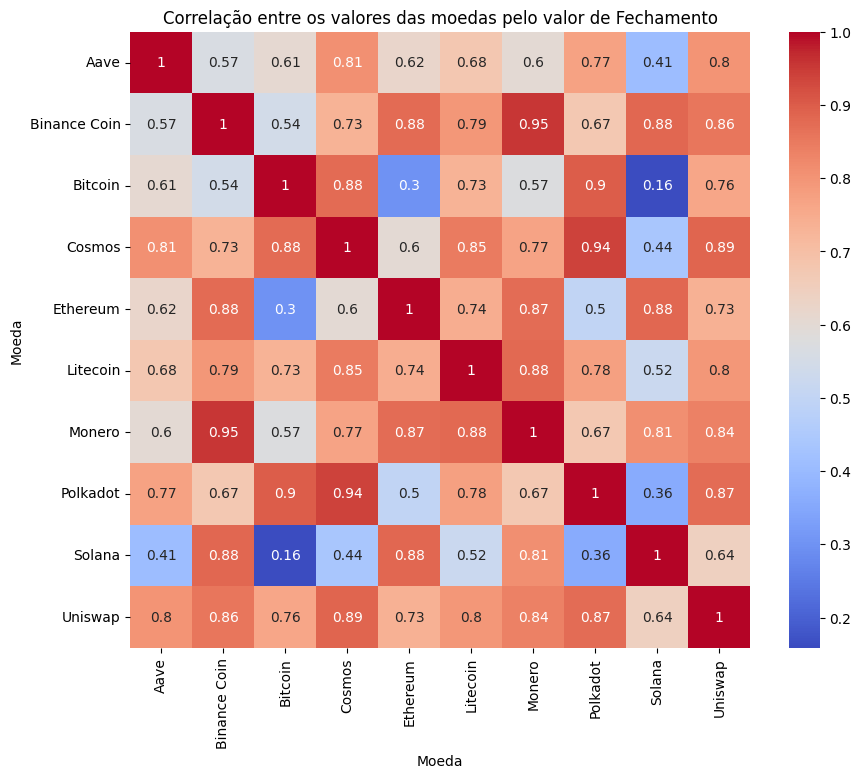

In [108]:
# Pergunta 7 - Existe correlação entre os valores para todas as criptomoedas?

plt.figure(figsize=(10, 8))
sns.heatmap(criptoanlys.corr(), annot=True, cmap="coolwarm")
plt.title('Correlação entre os valores das moedas pelo valor de Fechamento')